# Dator uppgifter för gruppövning 1

- Innan ni skickar in så gör jag en muntlig och okulär kontroll. 
- Vanligtvis så räcker det med att svara med en eller två plottar eller en kort text på några meningar. 
- Jag har lagt in litet kod efter varje uppgift för att starta upp om ni vill. 
  Ni kan ta bort semikolon om ni önskar se resultatet av koden. 


**1.** 
Betrakta funktionen $f:\mathbb R \to \mathbb C$ given av 
$$ f(x) = x^{e^{-x^2}}. $$

- a) Plotta punkterna $f(x_i)$ i komplexa talplanet för $x_i = -2 + i\frac14$, $i=0,\dots,16$. 
     Ni kan använda `plot` tillsammans med `real()` samt `imag()` 
     för att få $x$- och $y$-koordinater för plotten.

- b) För $x\ge0$ så är $f(x)$ reellvärd. 
   Plotta funktionen $f(x)$ som en `stem`-plot för $x_j = j/10$, $j=0,\dots,30$.
   
Svara med att skicka in plottarna. 

Ni kan börja med följande kod. 

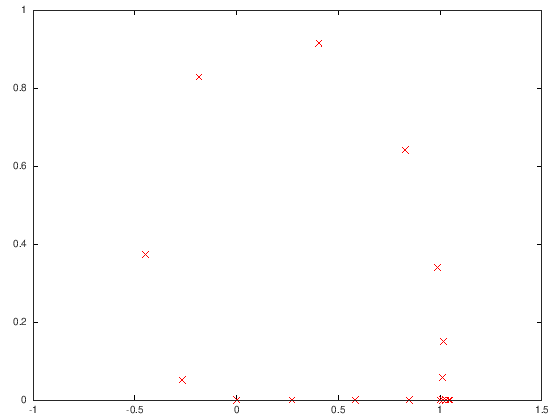

In [14]:
f = @(x) x.^exp(-x.^2); % Ger en funktion

x = -2:0.25:2;

z1 = f(x);

plot(real(z1),imag(z1),'xr');


**2.** En slumpmässig $10\times 10$ matris $A$ kan skapas med anropet `randn(10,10)`. 
- **(a)** Plotta egenvärdena till $A$ i komplexa talplanet. 
- **(b)** Plotta egenvärdena till $B = A\cdot A'$ i komplexa talplanet. 
- **(c)** Formulera en känd sats som förklarar att egenvärdena till $B$ är reella. 

Använd `real()` och `imag()` för $x$- och $y$-koordinater. 

In [15]:
A = randn(10,10);
B = A * A';

**3.** Med matrisen $B$ som i uppgiften ovan, använd `[U L] = eig(B)` 
för att få en bas av egenvektorer till $B$ som kolonner i matrisen $U$.

- **(a)** Beräkna matrisprodukten $U \cdot U^*$ och avrunda till 3 decimaler. Vad visar detta?
- **(b)** Beräkna matrisprodukten $C = U^{-1}\cdot B \cdot U$ och plotta matrisprodukten med `imagesc()`. Detta verifierar att kolonnerna i $U$ är egenvektorer till $B$. Jämför med matrisen $L$ erhållen med anropet av `eig()` genom att beräkna det maximala matriselement i matrisdifferensen $C-L$.

In [16]:
[U L] = eig(B);
round(U'*U*1000)/1000;

**4.** I rummet $\mathbb C^3$, låt shiftoperatorn $S$ och den tidsinvarianta operatorn $A$ ges av 

$$  S = 
    \begin{bmatrix}
    0 & 0 & 1\\ 1 & 0 & 0 \\ 0 & 1 & 0
    \end{bmatrix}
    \quad\text{och}\quad
         A = 
    \begin{bmatrix}
       2 & 1 & 5\\ 5 & 2 & 1 \\ 1 & 5 & 2
    \end{bmatrix}.
$$

- (a) Verifiera i MATLAB att $A S = S A$ genom att beräkna kommutatorn $AS - SA$. 
- (b) Låt $\delta = (1,0,0)$ ge *impulsen* och låt $h = A\delta$ ge *impulssvaret*. 
    Använd kommandot `circulant` i MATLAB för att återskapa $A$ från $h$. Visa också att $A$ kan skrivas som ett polynom i $S$ med koefficienter från $h$.
- (c) Skapa de tidsinvarianta operatorer $L$ och $H$ som har impulssvar $(1, 1, 0)$ respektive $(1,-1,0)$. (Lågpassfilter respektive högpassfilter). 

In [17]:
S = [ 0 0 1; 1 0 0; 0 1 0];
A = [ 2 1 5; 5 2 1; 1 5 2];
delta = [1 0 0]';
h = A * delta;

**5.** Konstruera den diskreta fouriertransformen $\mathscr T$ som en matris `T` och dess invers $\mathscr T^{-1}$ som en invers `Tinv` i MATLAB. 

- (a) Verifiera att kolumnerna $\{u_0,u_1,u_2\}$ i matrisen $\mathscr T^{-1}$ är egenvektorer till både $A$ och $S$ genom att diagonalisera $A$ och $S$ med en lämplig matrisprodukt. Visa också att de är **ortogonala** genom att beräkna deras skalärprodukt. (Skalärprodukten $\langle u, v\rangle$ beräknas i MATLAB med `v' * u` om både $u$ och $v$ representeras som kolonnmatriser.)
- (b) Beräkna överföringsfunktionen $H=\mathscr T h$. Plotta med `bar` både funktionen `h` och dess amplitudspektra `abs(H)`. Gör två plottar i en matris med `subplot`. 
 Använd `xlabel("i")` och `xlabel("k")` för att märka $x$-axeln med värdena $i,k=0,1,2$. 
- (c) Verifiera att `T*h` ger samma svar som MATLAB kommandot `fft(h)`. 

In [18]:
a = exp(I*2*pi/3);
a1 = a^(-1);
T = [ 1 1 1; 1 a1 a1^2; 1 a1^2 a1^4];
Tinv = (1/3) * [1 1 1; 1 a a^2; 1 a^2 a^4];

u1 = Tinv(:,1); u2 = Tinv(:,2); u3 = Tinv(:,3);

**6.** Låt en insignal $u\in\mathbb C^3$ vara given av `u=randn(3,1)`. 
- **(a)** Lös ut $y$ ur ekvationen 
    $$ A y = u $$
    genom att transformera $U= T u$ multiplicera med (`.*`) $H$ och slutligen inverstransformera. 
- **(b)** Gör samma sak men använd MATLABs funktioner `fft` och `ifft` istället. 

In [19]:
u = randn(3,1);
U = T * u;